In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier

MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

In [3]:
df = pd.read_csv('E:/Experiments/Likun-Wang/datas/analysis/G-train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 836 entries, Image to exponential_ngtdm_Strength
dtypes: float64(824), int64(10), object(2)
memory usage: 581.4+ KB


In [4]:
df_drop = df.dropna(axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 836 entries, Image to exponential_ngtdm_Strength
dtypes: float64(824), int64(10), object(2)
memory usage: 581.4+ KB


In [5]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df_drop['y']))}
class_mapping

{0: 0, 1: 1}

In [6]:
df_drop.head()

,Image,Mask,y,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,exponential_gldm_LargeDependenceLowGrayLevelEmphasis,exponential_gldm_LowGrayLevelEmphasis,exponential_gldm_SmallDependenceEmphasis,exponential_gldm_SmallDependenceHighGrayLevelEmphasis,exponential_gldm_SmallDependenceLowGrayLevelEmphasis,exponential_ngtdm_Busyness,exponential_ngtdm_Coarseness,exponential_ngtdm_Complexity,exponential_ngtdm_Contrast,exponential_ngtdm_Strength
0,1.jpg.dcm,1.nrrd,1,0.274215,0,0,921.531876,852,253,865.222515,...,80.281753,0.998559,0.012602,0.012844,0.012549,20.909406,0.011987,0.003731,8.660000e-07,0.055363
1,10.jpg.dcm,10.nrrd,1,0.395039,0,0,539.895732,508,204,510.357718,...,80.208314,0.998970,0.012653,0.012898,0.012592,23.927267,0.020983,0.001064,1.450000e-06,0.021123
2,11.jpg.dcm,11.nrrd,1,0.263451,0,0,563.808063,538,145,538.301031,...,78.286944,0.987130,0.013953,1.252524,0.012909,22.022493,0.001243,40.317389,1.857090e-04,93.096184
3,12.jpg.dcm,12insection.nrrd,1,0.299283,0,0,583.596142,642,213,648.521395,...,73.745412,0.953249,0.016476,0.431689,0.013348,28.365294,0.000759,44.547102,1.823870e-04,5.525404
4,13.jpg.dcm,13insertion.nrrd,1,0.210148,0,0,302.839046,288,67,298.511306,...,76.168538,0.982774,0.018779,0.104727,0.014054,8.956547,0.005530,2.524035,4.910000e-05,1.904740


In [7]:
from sklearn.preprocessing import LabelEncoder
df_drop['y'] = df_drop['y'].map(class_mapping)
y = LabelEncoder().fit_transform(df_drop['y'].values)
X = df_drop.iloc[:, 3:836].values
print(y.shape)
print(X.shape)

(89,)
(89, 833)


In [8]:
feat_labels = df_drop.columns[3:836]

In [9]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
print(X_std.shape)

(89, 833)


In [10]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [11]:
forest = RandomForestClassifier(bootstrap=True,criterion='gini',oob_score=True,n_jobs=-1, max_depth=5,
                                max_features='sqrt',n_estimators=10,min_samples_leaf=5,
                                random_state=50)
forest.fit(X_std, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) original_shape_Elongation      0.221895
 2) original_shape_MajorAxisLength 0.057939
 3) original_shape_Maximum2DDiameterColumn 0.056834
 4) wavelet-HL_gldm_HighGrayLevelEmphasis 0.053724
 5) square_glszm_SmallAreaHighGrayLevelEmphasis 0.042724
 6) original_shape_Maximum3DDiameter 0.042567
 7) wavelet-LH_firstorder_90Percentile 0.040801
 8) wavelet-LL_glcm_MaximumProbability 0.039467
 9) squareroot_ngtdm_Coarseness    0.038596
10) original_glrlm_RunPercentage   0.035770
11) wavelet-LH_glrlm_RunEntropy    0.034500
12) wavelet-HH_firstorder_Entropy  0.029318
13) original_shape_Maximum2DDiameterSlice 0.029176
14) exponential_firstorder_10Percentile 0.027893
15) wavelet-LL_glcm_Correlation    0.027418
16) wavelet-HH_ngtdm_Strength      0.023818
17) squareroot_gldm_DependenceVariance 0.019241
18) squareroot_gldm_SmallDependenceLowGrayLevelEmphasis 0.017649
19) wavelet-HH_glrlm_LowGrayLevelRunEmphasis 0.017018
20) original_firstorder_InterquartileRange 0.015451
21) wavelet-HL_glrlm_RunLen

1) original_shape_Elongation      0.221895
 2) original_shape_MajorAxisLength 0.057939
 3) original_shape_Maximum2DDiameterColumn 0.056834
 4) wavelet-HL_gldm_HighGrayLevelEmphasis 0.053724
 5) square_glszm_SmallAreaHighGrayLevelEmphasis 0.042724
 6) original_shape_Maximum3DDiameter 0.042567
 7) wavelet-LH_firstorder_90Percentile 0.040801
 8) wavelet-LL_glcm_MaximumProbability 0.039467
 9) squareroot_ngtdm_Coarseness    0.038596
10) original_glrlm_RunPercentage   0.035770

In [11]:
df1 = df[['original_shape_Elongation',
          'original_shape_MajorAxisLength',
          'original_shape_Maximum2DDiameterColumn',
          'wavelet-HL_gldm_HighGrayLevelEmphasis',
          'square_glszm_SmallAreaHighGrayLevelEmphasis',
          'original_shape_Maximum3DDiameter',
          'wavelet-LH_firstorder_90Percentile',
          'wavelet-LL_glcm_MaximumProbability',
          'squareroot_ngtdm_Coarseness',
          'original_glrlm_RunPercentage']]
X1 = df1.values
print(X1.shape)
y1 = y
std = StandardScaler()
X1_std = std.fit_transform(X1)
print(X1_std.shape)
print(y1.shape)

(89, 10)
(89, 10)
(89,)


In [12]:
clf1 = LogisticRegression(penalty='l2',C=2, multi_class='auto',solver='liblinear',random_state=1)
clf2 = ensemble.RandomForestClassifier()
clf3 = svm.SVC(probability=True)
clf4 =ensemble.RandomForestClassifier(bootstrap=True,criterion='gini',oob_score=True,n_jobs=-1, max_depth=5,
                                max_features='sqrt',n_estimators=10,min_samples_leaf=5,
                                random_state=50)

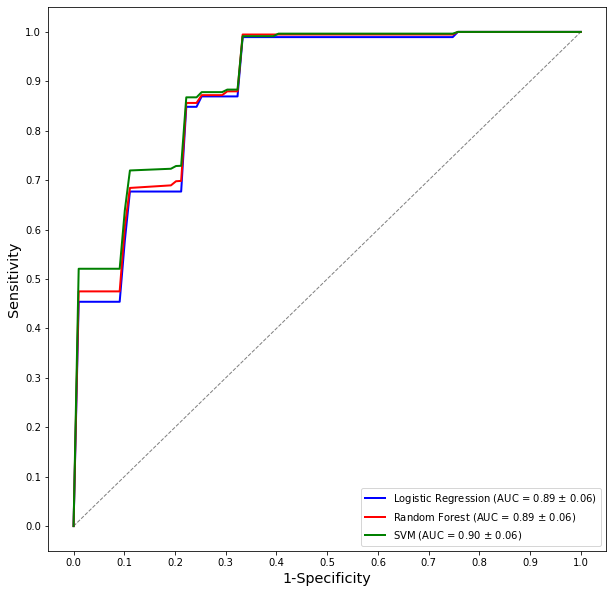

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.25, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X1_std, y1):
    probas_ = clf1.fit(X1_std[train], y1[train]).predict_proba(X1_std[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X1_std, y1):
    probas_ = clf4.fit(X1_std[train], y1[train]).predict_proba(X1_std[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X1_std, y1):
    probas_ = clf3.fit(X1_std[train], y1[train]).predict_proba(X1_std[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'SVM (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'medium'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('G-RF-ROC.jpg',dpi=1200)
plt.show()

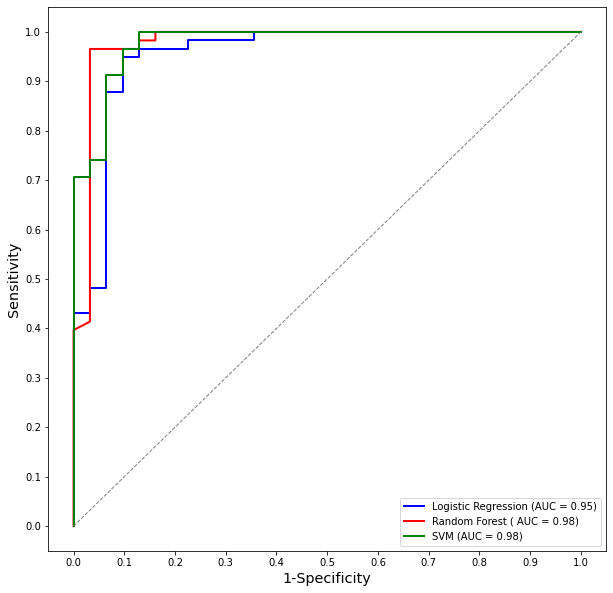

In [15]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

###################################################################
probas_ = clf1.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=1, lw=2, linestyle='-',label='Logistic Regression (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
###################################################################
probas_ = clf4.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=1, lw=2, linestyle='-',label='Random Forest ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf3.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='SVM (AUC = %0.2f)' % roc_auc) 

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'medium'
          )
plt.savefig('G-RF-ROC3.jpg',dpi=1200)
plt.show()

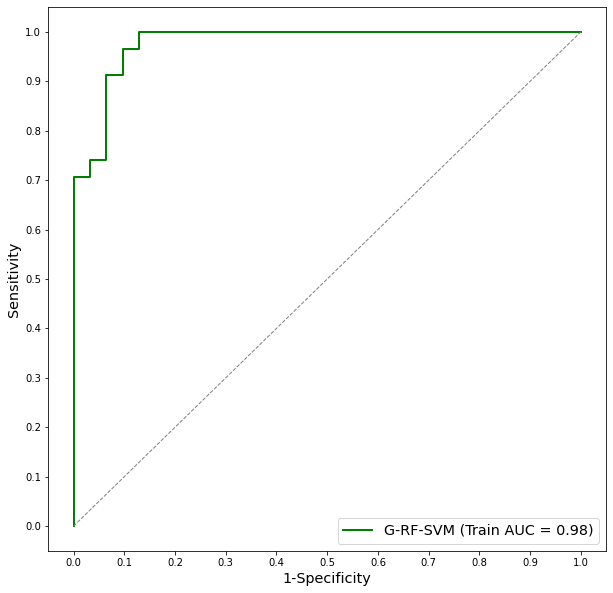

In [18]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

###################################################################

probas_ = clf3.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='G-RF-SVM (Train AUC = %0.2f)' % roc_auc) 

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
plt.savefig('11.jpg',dpi=1200)
plt.show()

In [19]:
df11 = pd.read_csv('E:/Experiments/Likun-Wang/datas/analysis/G-test.csv')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df11['y']))}
df11['y'] = df11['y'].map(class_mapping)
y11 = LabelEncoder().fit_transform(df11['y'].values)
df111 = df11[['original_shape_Elongation',
          'original_shape_MajorAxisLength',
          'original_shape_Maximum2DDiameterColumn',
          'wavelet-HL_gldm_HighGrayLevelEmphasis',
          'square_glszm_SmallAreaHighGrayLevelEmphasis',
          'original_shape_Maximum3DDiameter',
          'wavelet-LH_firstorder_90Percentile',
          'wavelet-LL_glcm_MaximumProbability',
          'squareroot_ngtdm_Coarseness',
          'original_glrlm_RunPercentage']]
X11 = df111.values

X11_std = std.fit_transform(X11)
print(X11_std.shape)
print(y11.shape)

(50, 10)
(50,)


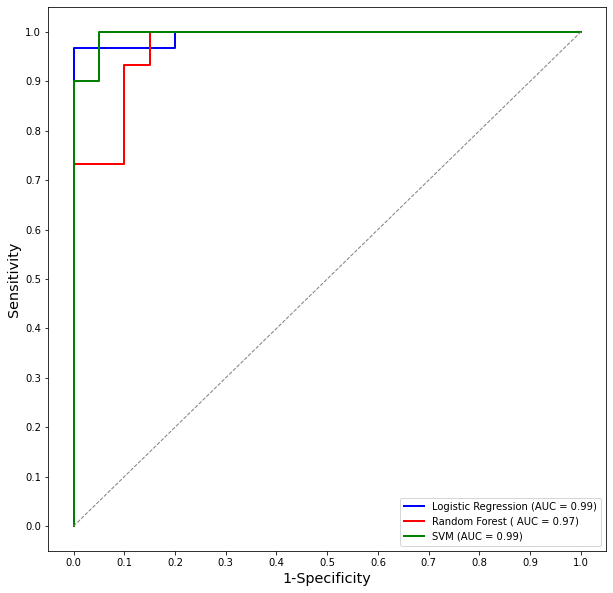

In [20]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

###################################################################
probas_ = clf1.predict_proba(X11_std)
fpr, tpr, thresholds = roc_curve(y11, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=1, lw=2, linestyle='-',label='Logistic Regression (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
###################################################################
probas_ = clf4.predict_proba(X11_std)
fpr, tpr, thresholds = roc_curve(y11, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=1, lw=2, linestyle='-',label='Random Forest ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf3.predict_proba(X11_std)
fpr, tpr, thresholds = roc_curve(y11, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='SVM (AUC = %0.2f)' % roc_auc) 

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'medium'
          )
plt.savefig('G-RF-ROC2.jpg',dpi=1200)
plt.show()

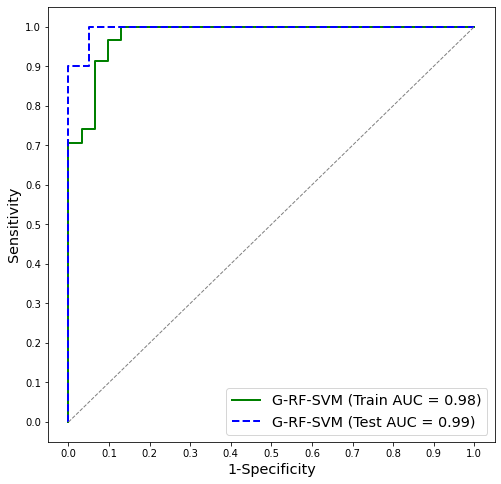

In [22]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

###################################################################

probas_ = clf3.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='G-RF-SVM (Train AUC = %0.2f)' % roc_auc) 

###################################################################
probas_ = clf3.predict_proba(X11_std)
fpr, tpr, thresholds = roc_curve(y11, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='--',label='G-RF-SVM (Test AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
plt.savefig('12.jpg',dpi=1200)
plt.show()